In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
data = pd.read_csv('FoodPrice_in_Turkey.csv')
data.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


1. Vẽ biểu đồ cột so sánh giá gạo (Rice-Retail) tháng 12 năm 2019 của Ankara, Istanbul, Izmir và National Average.

In [3]:
#Kiểm tra giá trị của Month, Year, place
data['Month'].unique() 
data['Year'].unique() 
data['Place'].unique() 

array(['National Average', 'Ankara', 'Istanbul', 'Izmir'], dtype=object)

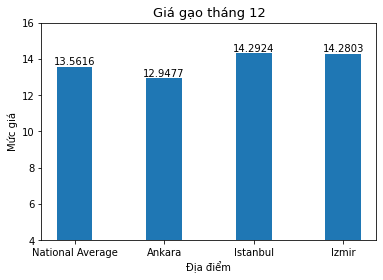

In [4]:
data1 = data[(data['Month']==12) & (data['Year']==2019) & (data['ProductName']=='Rice - Retail')]
plt.bar(x = data1['Place'], height=data1['Price'],  width=0.4, bottom=4)
plt.title('Giá gạo tháng 12', fontsize=13)
plt.ylim(4, 16)
ax = plt.gca()
ax.set_xlabel('Địa điểm')
ax.set_ylabel('Mức giá')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

Looking from an overall perspective, except for Ankara, the price of rice in Istanbul and Izmir exceed National Average price 

2. Vẽ biểu đồ đường phân tích xu hướng giá gạo (Rice-Retail) trung bình cả nước (National Average) trong năm 2019 tại Thổ Nhĩ Kì.

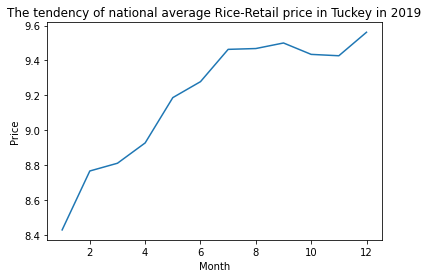

In [5]:
data2 = data[(data['Year']==2019) & (data['Place']=='National Average') & (data['ProductName']=='Rice - Retail')]
plt.plot(data2['Month'], data2['Price'])
plt.title('The tendency of national average Rice-Retail price in Tuckey in 2019')
plt.xlabel('Month')
plt.ylabel('Price')
plt.show()

Overall, there is an upward trend in avarage price over 12 months in 2019 and it is predicted to continue increase in 2020.<br>
It is clear that, over the first half of year, the price experience a continuously sharp increase while the later years, the speed of growth slowed down and slightly dip before continue to considerably rise on November.

3. Vẽ biểu đồ Scatter phân tích mối liên quan giữa giá gạo và giá gas trung bình quốc gia (National Average) tại Thổ Nhĩ Kì.

In [6]:
data['ProductName'].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

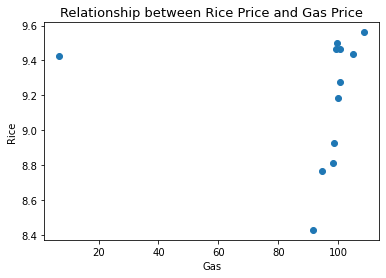

In [7]:
data3 = data[(data['ProductName']=='Fuel (gas) - Retail') & (data['Place']=='National Average') & (data['Year']==2019)]
plt.scatter(data3['Price'], data2['Price'])
plt.title('Relationship between Rice Price and Gas Price', fontsize=13)
plt.xlabel('Gas')
plt.ylabel('Rice')
plt.show()

The Rice'price fluctuate wildly along with slightly increase of gas'price<br>
There is a adnormal point in the graph, the gas price is low while the price of rice is much higher, may be in the collecting data processing, there is imperfection information recorded

#### Vẽ các biểu đồ cột so sánh giá Milk (powder, infant formula) và Fuel (gas) tháng 12 cuối năm năm 2019 của Ankara, Istanbul, Izmir và National Average.

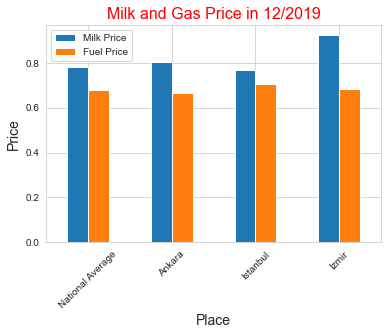

In [33]:
#Lọc dữ liệu, tạo multiple bar chart bằng dataframe
data4 = data[(data['Month']==12)&(data['Year']==2019) & (data['ProductName']=='Milk (powder, infant formula) - Retail')].reset_index()
data5 = data[(data['Month']==12)&(data['Year']==2019) & (data['ProductName']=='Fuel (gas) - Retail')].reset_index()
#tạo dataframe từ nhiều series, phải reset lại để các series có cùng index
data_45 = pd.DataFrame({'x': data4['Place'], 'Milk Price': data4['Price'], 'Fuel Price': data5['Price']})
data_45.plot(x = 'x', y = ['Milk Price', 'Fuel Price'], kind = 'bar')
plt.title('Milk and Gas Price in 12/2019', fontsize = 16, color = 'r')
plt.xlabel('Place', fontsize = 14)
plt.ylabel('Price', fontsize = 14)
plt.xticks(rotation=45)
plt.show()

<AxesSubplot:xlabel='Place', ylabel='Price'>

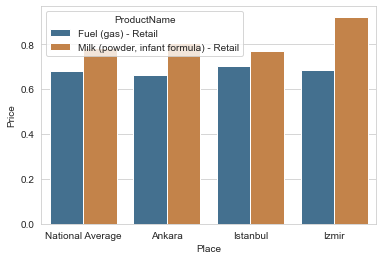

In [37]:
dt = data[(data['Month']==12)&(data['Year']==2019) & ((data['ProductName']=='Milk (powder, infant formula) - Retail') | (data['ProductName']=='Fuel (gas) - Retail'))]
sns.barplot(x='Place', y='Price', hue='ProductName', data=dt,saturation=0.5)

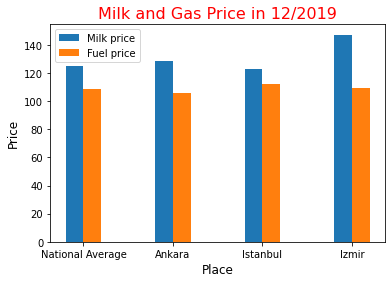

In [9]:
import numpy as np
data4 = data[(data['Month']==12)&(data['Year']==2019) & (data['ProductName']=='Milk (powder, infant formula) - Retail')]
data5 = data[(data['Month']==12)&(data['Year']==2019) & (data['ProductName']=='Fuel (gas) - Retail')]
x_axis = np.arange(len(data4['Place']))
#dùng np vì có tính năng broadcasting
#Muti bar chart
plt.bar(x_axis - 0.1, data4['Price'], width=0.2, label= 'Milk price')
#x_axis #set label locations, step -0.1+0.2=0.1 vẽ liền kề nhau
plt.bar(x_axis + 0.1, data5['Price'], width=0.2, label= 'Fuel price')
plt.xticks(x_axis, data4['Place'])
#x_axis: set text labels and properties, location of text
plt.title('Milk and Gas Price in 12/2019', fontsize = 16, color = 'r')
plt.xlabel('Place', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.legend()
plt.show()

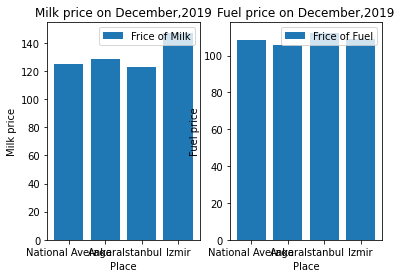

In [12]:
data4 = data[(data['Month']==12)&(data['Year']==2019) & (data['ProductName']=='Milk (powder, infant formula) - Retail')]
data5 = data[(data['Month']==12)&(data['Year']==2019) & (data['ProductName']=='Fuel (gas) - Retail')]
fig, ax = plt.subplots(1,2)
ax[0].bar(data4['Place'], data4['Price'], label='Frice of Milk')
ax[0].set_xlabel('Place')
ax[0].set_ylabel('Milk price')
ax[0].set_title('Milk price on December,2019')
ax[0].legend(loc='upper right')

ax[1].bar(data5['Place'], data5['Price'], label='Frice of Fuel')
ax[1].set_xlabel('Place')
ax[1].set_ylabel('Fuel price')
ax[1].set_title('Fuel price on December,2019')
ax[1].legend(loc='upper right')
plt.show()

In [13]:
data.head()

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


<AxesSubplot:>

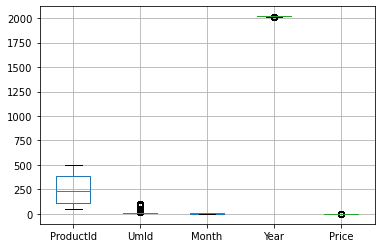

In [14]:
s_scaler = MinMaxScaler()
df = np.array(data['Price']).reshape(-1,1)
data['Price'] = s_scaler.fit_transform(df)
data.boxplot()

In [15]:
data['ProductName'].unique()

array(['Rice - Retail', 'Wheat flour - Retail', 'Beans (white) - Retail',
       'Potatoes - Retail', 'Eggs - Retail', 'Meat (chicken) - Retail',
       'Sugar - Retail', 'Garlic - Retail', 'Lentils - Retail',
       'Pasta - Retail', 'Tomatoes - Retail',
       'Groundnuts (shelled) - Retail', 'Bread (common) - Retail',
       'Coffee - Retail', 'Onions - Retail', 'Tea (green) - Retail',
       'Cabbage - Retail', 'Meat (mutton) - Retail',
       'Oil (sunflower) - Retail', 'Salt - Retail',
       'Coffee (instant) - Retail', 'Peas (green, dry) - Retail',
       'Apples (red) - Retail', 'Cauliflower - Retail',
       'Cucumbers (greenhouse) - Retail', 'Oil (olive) - Retail',
       'Chickpeas - Retail', 'Bananas - Retail', 'Bulgur - Retail',
       'Tea - Retail', 'Fuel (petrol-gasoline) - Retail',
       'Transport (public) - Retail', 'Tomatoes (paste) - Retail',
       'Fuel (gas) - Retail', 'Apples - Retail', 'Oranges - Retail',
       'Yogurt - Retail', 'Bread (pita) - Retail', 'C

#### Vẽ các biểu đồ đường phân tích xu hướng giá gạo (Rice-Retail), giá Fuel (gas) trung bình cả nước (National Average) trong năm 2016, 2018, 2019 tại Thổ Nhĩ Kì. <br>Vẽ biểu đồ Scatter phân tích mối liên quan giữa giá gạo và giá gas trung bình quốc gia (National Average) tại Thổ Nhĩ Kì các năm 2016, 2018, 2019.

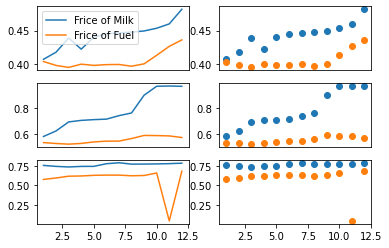

In [16]:
newdata = data[(data['Year']==2016)|(data['Year']==2018) | (data['Year']==2019)]
data6 = newdata[(newdata['ProductName']=='Milk (powder, infant formula) - Retail')& (newdata['Place']=='National Average')]
data7 = newdata[(newdata['ProductName']=='Fuel (gas) - Retail')& (newdata['Place']=='National Average')]
fig, ax = plt.subplots(3,2)
ax[0][0].plot(data6[data6['Year']==2016]['Month'],data6[data6['Year']==2016]['Price'], label='Frice of Milk')
ax[0][0].plot(data7[data7['Year']==2016]['Month'],data7[data7['Year']==2016]['Price'], label='Frice of Fuel')
ax[0][0].legend()
ax[0][0].set_xticks([]) #xticks và xticklabels đều đc, nhưng xticklabels là về tên l, bỏ list[], xóa bớt gtri hiện ra
ax[1][0].plot(data6[data6['Year']==2018]['Month'],data6[data6['Year']==2018]['Price'])
ax[1][0].plot(data7[data7['Year']==2018]['Month'],data7[data7['Year']==2018]['Price'])
ax[1][0].set_xticks([]) #xticks và xticklabels đều đc, nhưng xticklabels là về tên label, bỏ list[], xóa bớt gtri hiện ra
ax[2][0].plot(data6[data6['Year']==2019]['Month'],data6[data6['Year']==2019]['Price'])
ax[2][0].plot(data7[data7['Year']==2019]['Month'],data7[data7['Year']==2019]['Price'])

ax[0][1].scatter(data6[data6['Year']==2016]['Month'],data6[data6['Year']==2016]['Price'])
ax[0][1].scatter(data7[data7['Year']==2016]['Month'],data7[data7['Year']==2016]['Price'])
ax[0][1].set_xticks([]) #xticks và xticklabels đều đc, nhưng xticklabels là về tên label, bỏ list[], xóa bớt gtri hiện ra
ax[1][1].scatter(data6[data6['Year']==2018]['Month'],data6[data6['Year']==2018]['Price'])
ax[1][1].scatter(data7[data7['Year']==2018]['Month'],data7[data7['Year']==2018]['Price'])
ax[1][1].set_xticks([]) #xticks và xticklabels đều đc, nhưng xticklabels là về tên label, bỏ list[], xóa bớt gtri hiện ra
ax[2][1].scatter(data6[data6['Year']==2019]['Month'],data6[data6['Year']==2019]['Price'])
ax[2][1].scatter(data7[data7['Year']==2019]['Month'],data7[data7['Year']==2019]['Price'])
plt.show()

#### Lọc dữ liệu sản phẩm gạo, vẽ biểu đồ xu hướng qua các năm

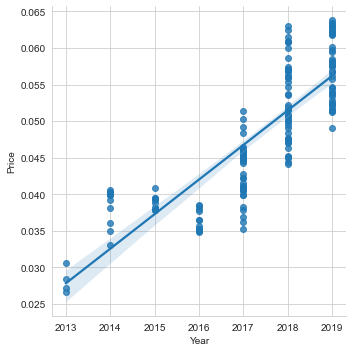

In [17]:
sns.set_style('whitegrid')
rice_data = data[data['ProductId'] == 52]
sns.lmplot(x='Year', y='Price', data = rice_data)

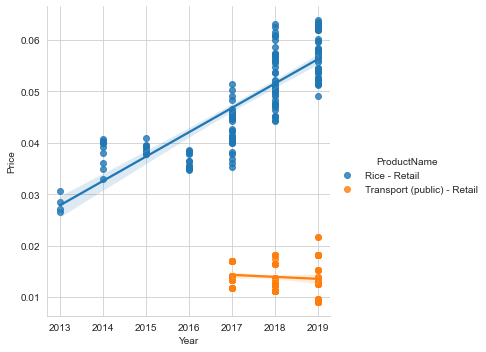

In [18]:
trans_data = data[(data['ProductName']=='Transport (public) - Retail') | (data["ProductName"] == "Rice - Retail")]
sns.lmplot(x='Year', y='Price', hue='ProductName', data=trans_data)

#### Vẽ biểu đồ tần số cho các sản phẩm theo năm

<AxesSubplot:xlabel='Year', ylabel='count'>

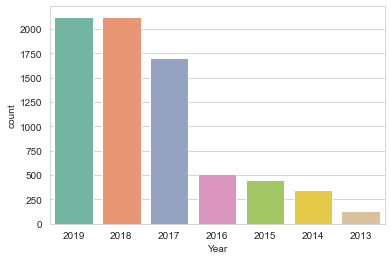

In [19]:
sns.countplot(x='Year', data = data, order = data['Year'].value_counts().index, palette='Set2')

In [21]:
data['Year'].value_counts().index

Int64Index([2019, 2018, 2017, 2016, 2015, 2014, 2013], dtype='int64')

<AxesSubplot:xlabel='Place', ylabel='count'>

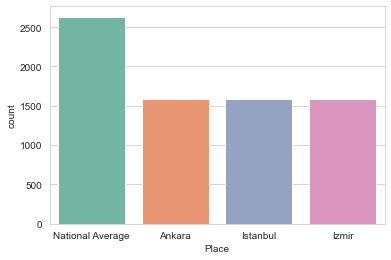

In [22]:
sns.countplot(x='Place', data=data, palette='Set2')

Text(0.5, 1.0, 'Quantity per year in different place')

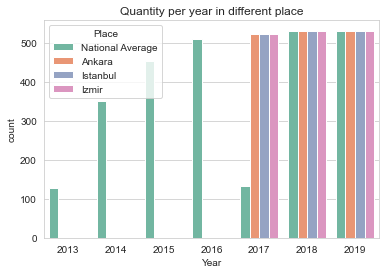

In [23]:
sns.countplot(x='Year', hue='Place', data=data, palette='Set2')
plt.title('Quantity per year in different place')

<AxesSubplot:xlabel='Price'>

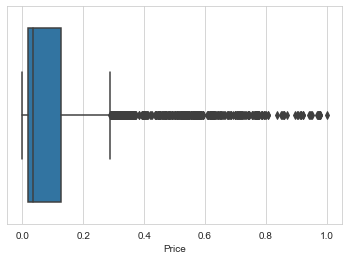

In [24]:
sns.boxplot(x=data['Price'])

<AxesSubplot:xlabel='Year', ylabel='Price'>

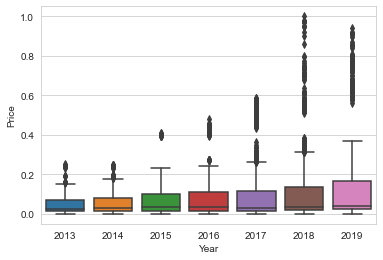

In [25]:
sns.boxplot(x='Year', y='Price', data=data)

<AxesSubplot:ylabel='Price'>

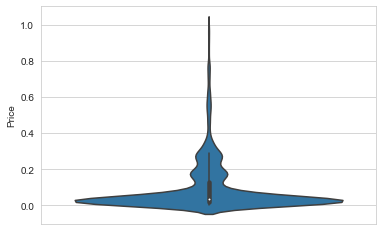

In [26]:
sns.violinplot(y = 'Price', data=data)

<AxesSubplot:xlabel='Year', ylabel='Price'>

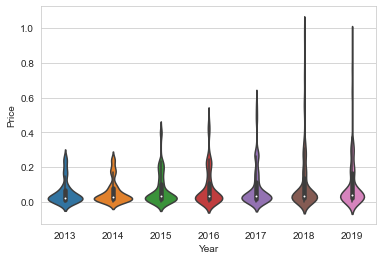

In [27]:
sns.violinplot(x = "Year", y = 'Price', data=data)